In [1]:
from keras.datasets import mnist

(X_train,_),(X_test,_) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
X_train = X_train/255.
X_test = X_test/255.

X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [4]:
#latent space
encoding_dim = 32

In [5]:
from keras import layers

input_img = layers.Input(shape=(784,))

encoded = layers.Dense(256, activation = 'elu')(input_img)
encoded = layers.Dense(128, activation='elu')(encoded)
encoded = layers.Dense(encoding_dim, activation='elu')(encoded)

decoded = layers.Dense(128, activation='elu')(encoded)
decoded =layers.Dense(256, activation='elu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [6]:
from keras import models

autoencoder = models.Model(input_img, decoded) # Model(input, output)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               201488

In [7]:
encoder = models.Model(input_img, encoded)
encoder.summary()                    

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
Total params: 237,984
Trainable params: 237,984
Non-trainable params: 0
_________________________________________________________________


In [9]:
encoded_input = layers.Input(shape =(encoding_dim,))

decoder_layer = autoencoder.layers[-3](encoded_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)

decoder = models.Model(encoded_input, decoder_layer)
decoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               201488    
Total params: 238,736
Trainable params: 238,736
Non-trainable params: 0
_________________________________________________________________


In [11]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, validation_data=(X_test,X_test))

Epoch 1/50
235/235 [==============================] - 5s 17ms/step - loss: 0.2816 - val_loss: 0.1394
Epoch 2/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1338 - val_loss: 0.1189
Epoch 3/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1176 - val_loss: 0.1100
Epoch 4/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1099 - val_loss: 0.1051
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1056 - val_loss: 0.1027
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1030 - val_loss: 0.1003
Epoch 7/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1007 - val_loss: 0.0990
Epoch 8/50
235/235 [==============================] - 3s 14ms/step - loss: 0.0993 - val_loss: 0.0977
Epoch 9/50
235/235 [==============================] - 3s 14ms/step - loss: 0.0979 - val_loss: 0.0962
Epoch 10/50
235/235 [==============================] - 3s 14ms/step - loss: 0.0966 - val_lo

In [12]:
encoded_imgs = encoder.predict(X_test)
encoded_imgs.shape

(10000, 32)

In [13]:
decoded_imgs = decoder.predict(encoded_imgs)
decoded_imgs.shape

(10000, 784)

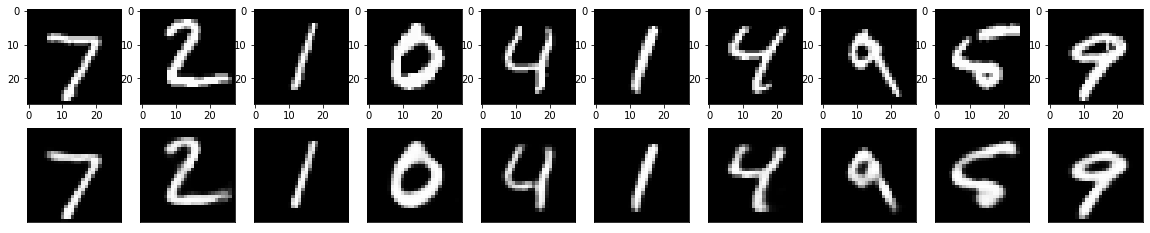

In [19]:
import matplotlib.pyplot as plt

n=10

plt.figure(figsize=(20,4))
for i in range(n):
    
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()